# Data Loading

In [0]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import collections

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline
import scipy.stats as stats
import sklearn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/CS536/"

 CleanedDataset.sav   datac.csv
 csvfiles	      ML3AllSites.csv
 datac1.gsheet	     'ML3 Final Data'
 datac1.xlsx	      Tab.delimited.Cleaned.dataset.WITH.variable.labels.csv


In [0]:
!pip install pyreadstat
import pyreadstat
df, meta = pyreadstat.read_sav("/content/drive/My Drive/CS536/CleanedDataset.sav")
df.head()

,session_id,session_date,last_update_date,session_last_update_date,referrer,creation_date,session_creation_date,expcomments,numparticipants_actual,numparticipants,...,diseaseforder,quoteorder,flagprimorder,sunkcostorder,anchorinorder,allowedforder,gamblerforder,moneypriorder,imaginedorder,iatorder
0,2400853.0,2013-08-28 12:15:55,8/28/13 12:15,8/28/13 12:15,abington,2013-08-28 11:51:56,2013-08-28 11:51:56,.,,5,...,4.0,3.0,7.0,2.0,8.0,6.0,10.0,1.0,11.0,12.0
1,2400856.0,2013-08-28 12:13:49,8/28/13 12:13,8/28/13 12:13,abington,2013-08-28 11:52:27,2013-08-28 11:52:27,.,,5,...,7.0,5.0,2.0,6.0,11.0,9.0,1.0,4.0,8.0,12.0
2,2400860.0,2013-08-28 12:15:57,8/28/13 12:15,8/28/13 12:15,abington,2013-08-28 11:52:58,2013-08-28 11:52:58,.,,5,...,2.0,8.0,9.0,3.0,5.0,10.0,6.0,4.0,11.0,12.0
3,2400868.0,2013-08-28 12:12:21,8/28/13 12:12,8/28/13 12:12,abington,2013-08-28 11:53:35,2013-08-28 11:53:35,.,,5,...,7.0,8.0,10.0,6.0,9.0,4.0,1.0,11.0,2.0,12.0
4,2400872.0,2013-08-28 12:11:58,8/28/13 12:11,8/28/13 12:11,abington,2013-08-28 11:54:04,2013-08-28 11:54:04,.,,.,...,10.0,3.0,11.0,6.0,9.0,5.0,4.0,1.0,2.0,12.0


In [0]:
data=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/datac.csv",encoding='unicode_escape')
data.head()

,session_id,session_date,last_update_date,session_last_update_date,referrer,creation_date,session_creation_date,expcomments,numparticipants_actual,numparticipants,...,diseaseforder,quoteorder,flagprimorder,sunkcostorder,anchorinorder,allowedforder,gamblerforder,moneypriorder,imaginedorder,iatorder
0,2407367,3/9/2013,9/3/13 12:47,9/3/13 12:47,abington,3/9/2013,3/9/2013,NaN,,9,...,3,5,9,10,11,7,2,4,8,12
1,2401249,28/8/2013,8/28/13 15:31,8/28/13 15:31,brasilia,28/8/2013,28/8/2013,atividade did??tica em disciplina,,20,...,5,2,4,1,8,11,3,7,6,12
2,2401250,28/8/2013,8/28/13 15:24,8/28/13 15:24,brasilia,28/8/2013,28/8/2013,atividade did??tica em disciplina,,20,...,6,9,7,11,5,3,4,10,2,12
3,2401328,28/8/2013,8/28/13 16:00,8/28/13 16:00,brasilia,28/8/2013,28/8/2013,atividade did??tica,,20,...,7,10,5,3,1,11,9,6,2,12
4,2401371,28/8/2013,8/28/13 16:37,8/28/13 16:37,brasilia,28/8/2013,28/8/2013,atividade didatica em disciplina,,20,...,9,2,8,1,7,10,6,11,3,12


# Data separated as per data type

In [0]:
data = data.replace(r'^\s+$', np.nan, regex=True)

In [0]:
data.shape

(6344, 382)

In [0]:
data_cat = data[['referrer','expgender','flagGroup','exprunafter','compensation','recruitment','separatedornot','sample','sunkgroup', 'gainlossgroup','gainlossDV','anch1group','anch2group','anch3group','anch4group','gambfalgroup','scalesgroup','scales','scalesreca','scalesrecb', 'reciprocitygroup','reciprocityother','reciprocityus','allowedforbiddenGroup','allowedforbidden','quotearec','quotebrec','quoteGroup','quote','totalflagestimations','totalnoflagtimeestimations','flagfilter','MoneyGroup','moneyfilter','ContactGroup','IATfilter','partgender','totexpmissed','IATEXPfilter', 'allowedforbiddena','allowedforbiddenb','artwarm','citizenship','diseaseframinga','diseaseframingb','ethnicity','flagdv1','flagdv2','flagdv3','flagdv4','flagdv5','flagdv6','flagdv7','flagdv8','flagsupplement1','flagsupplement2','flagsupplement3','flagtimeestimate1','flagtimeestimate2','flagtimeestimate3','flagtimeestimate4','iatexplicitart1','iatexplicitart2','iatexplicitart3','iatexplicitart4','iatexplicitart5','iatexplicitart6','iatexplicitmath1','iatexplicitmath2','iatexplicitmath3','iatexplicitmath4','iatexplicitmath5','iatexplicitmath6','imaginedexplicit1','imaginedexplicit2','imaginedexplicit3','imaginedexplicit4','imaginedexplicit1','imaginedexplicit2','imaginedexplicit3','imaginedexplicit4','major','mathwarm','moneyagea','moneyageb','imaginedexplicit1','imaginedexplicit2','imaginedexplicit3','imaginedexplicit4','major','mathwarm','moneyagea','moneyageb','politicalid','quotea','quoteb','reciprocityothera','reciprocityotherb','reciprocityusa','reciprocityusb','scalesa','scalesb','sex','sunkcosta','sunkcostb','sysjust1','sysjust2','sysjust3','sysjust4','sysjust5','sysjust6','sysjust7','sysjust8','previous_session_schema','user_agent','study_url','study_name','us_or_international','lab_or_online','task_id.1','task_id.3','task_id.4','task_id.5','task_id.6','task_id.7','task_id.8','task_id.9','task_id.10','task_id.11','task_id.12','task_id.13','task_id.14','task_id.15','task_id.16','task_id.17','task_id.18','task_id.19','task_id.20','task_id.21','task_id.22','task_id.23','task_id.25','task_id.26','task_id.27','task_id.28','task_id.29','task_id.30','task_id.31','task_id.32','task_id.33','task_id.34','task_id.35','task_id.36','task_id.37','task_id.38','task_id.39','task_id.25','task_id.26','task_id.27','task_id.28','task_id.29','task_id.30','task_id.31','task_id.32','task_id.33','task_id.34','task_id.35','task_id.36','task_id.37','task_id.38','task_id.39','citizenship2','religion','priorexposure1','priorexposure10','priorexposure11','priorexposure12','priorexposure13','priorexposure2','priorexposure3','priorexposure4','priorexposure5','priorexposure6','priorexposure7','priorexposure8','priorexposure9','task_url.45','task_creation_date.45','mturk.non.US','mturk.total.mini.exps','mturk.duplicate','mturk.exclude.null','mturk.keep','mturk.exclude','filter_$','order','iat_exclude','o1','o2','o3','o4','o5','o6','o7','o8','o9','o10','o11','scalesorder','reciprocorder','diseaseforder','quoteorder','flagprimorder','sunkcostorder','anchorinorder','allowedforder','gamblerforder','moneypriorder','imaginedorder','task_url.2', 'task_url.3', 'task_url.4', 'task_url.5', 'task_url.6',
       'task_url.7', 'task_url.8', 'task_url.9', 'task_url.10', 'task_url.11',
       'task_url.12', 'task_url.13', 'task_url.14', 'task_url.15',
       'task_url.16', 'task_url.17', 'task_url.18', 'task_url.19',
       'task_url.20', 'task_url.21', 'task_url.22', 'task_url.23',
       'task_url.24', 'task_url.25', 'task_url.26', 'task_url.27',
       'task_url.28', 'task_url.29', 'task_url.30', 'task_url.31',
       'task_url.32', 'task_url.33', 'task_url.34', 'task_url.35',
       'task_url.36', 'task_url.37', 'task_url.38', 'task_url.39',
       'task_url.40', 'task_url.41', 'task_url.42', 'task_url.43',
       'task_url.44', 'task_id.24', 'task_id.40', 'task_id.41',
       'task_id.42', 'task_id.43', 'task_id.44', 'task_url.0',  'moneyethnicitya',
       'moneyethnicityb', 'moneygendera', 'moneygenderb', 'nativelang',
       'nativelang2', 'noflagtimeestimate1', 'noflagtimeestimate2',
       'noflagtimeestimate3', 'noflagtimeestimate4', 'omdimc3', 'race','task_url.1']]

In [0]:
data_cat.shape

(6344, 282)

In [0]:
data_num = data[['gambfalDV','numparticipants_actual','numparticipants','exprace','age','sunkDV','anchoring1','anchoring2','anchoring3','anchoring4','Ranchori','RAN001','RAN002','RAN003','Ranch1','Ranch2','Ranch3','Ranch4','flagdv','Sysjust','Imagineddv','IATexpart','IATexpmath','IATexp.overall','anchoring1a','anchoring1b','anchoring2a','anchoring2b','anchoring3a','anchoring3b','anchoring4a','anchoring4b','d_donotuse','gamblerfallacya','gamblerfallacyb','omdimc3rt','omdimc3trt','previous_session_id','anchoring1akm','anchoring1bkm','anchoring3ameter','anchoring3bmeter','meanlatency','meanerror','block2_meanerror','block3_meanerror','block5_meanerror','block6_meanerror','lat11','lat12','lat21','lat22','sd1','sd2','d_art1','d_art2','d_art']]

In [0]:
data_num.shape

(6344, 57)

In [0]:
data_nlp = data[['expcomments','feedback','exprunafter2','imagineddescribe','text']]

In [0]:
data_nlp.shape

(6344, 4)

In [0]:
data_date = data[['session_id', 'session_date', 'last_update_date','session_last_update_date','creation_date','session_creation_date','task_creation_date.1','task_creation_date.2','task_creation_date.3','task_creation_date.4','task_creation_date.5','task_creation_date.6','task_creation_date.7','task_creation_date.8','task_creation_date.9','task_creation_date.10','task_creation_date.11','task_creation_date.12','task_creation_date.13','task_creation_date.14','task_creation_date.15','task_creation_date.16','task_creation_date.17','task_creation_date.18','task_creation_date.19','task_creation_date.20','task_creation_date.21','task_creation_date.22','task_creation_date.23','task_creation_date.24','task_creation_date.25','task_creation_date.26','task_creation_date.27','task_creation_date.28','task_creation_date.29','task_creation_date.30','task_creation_date.31','task_creation_date.32','task_creation_date.33','task_creation_date.34','task_creation_date.35','task_creation_date.36','task_creation_date.37','task_creation_date.38','task_creation_date.39','task_creation_date.40','task_creation_date.41','task_creation_date.42','task_creation_date.43','task_creation_date.44']]

In [0]:
data_date.shape

(6344, 47)

In [0]:
data_1val = data[['task_creation_date.0','session_status','gamblerfallacya_sd','gamblerfallacyb_sd','imptaskto','task_status','task_sequence','session_created_by','task_id.0','task_id.2','task_id.45','beginlocaltime','mturk.Submitted.PaymentReq','iatorder']]

In [0]:
data_1val.shape

(6344, 14)

In [0]:
data_cat.to_csv('/content/drive/My Drive/CS536/csvfiles/data_cat.csv', index=False)
data_num.to_csv('/content/drive/My Drive/CS536/csvfiles/data_num.csv', index=False)
data_1val.to_csv('/content/drive/My Drive/CS536/csvfiles/data_1val.csv', index=False)
data_nlp.to_csv('/content/drive/My Drive/CS536/csvfiles/data_nlp.csv', index=False)
data_date.to_csv('/content/drive/My Drive/CS536/csvfiles/data_date.csv', index=False)

In [0]:
temp_11 = data.drop(data_cat.columns, axis=1)
temp_11 = temp_11.drop(data_num.columns,axis =1)
temp_11 = temp_11.drop(data_nlp.columns,axis =1)
temp_11 = temp_11.drop(data_1val.columns,axis =1)
temp_11 = temp_11.drop(data_date.columns,axis =1)

In [0]:
temp_11.columns

Index(['user_id'], dtype='object')

# Data Exploration

In [0]:
rowfull = pd.DataFrame(columns = data.columns)
for i in range(len(data)):
        if data.loc[i].isnull().sum() == 0:
            rowfull = rowfull.append(data.loc[i])

rowfull.head()

,session_id,session_date,last_update_date,session_last_update_date,referrer,creation_date,session_creation_date,expcomments,numparticipants_actual,numparticipants,...,diseaseforder,quoteorder,flagprimorder,sunkcostorder,anchorinorder,allowedforder,gamblerforder,moneypriorder,imaginedorder,iatorder


In [0]:
x = data.isna().sum()

In [0]:
data_num=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_num.csv",encoding='unicode_escape')
data_cat=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_cat.csv",encoding='unicode_escape')
data_date=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_date.csv",encoding='unicode_escape')
data_nlp = pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_nlp_f1.csv",encoding='unicode_escape') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (172,188) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


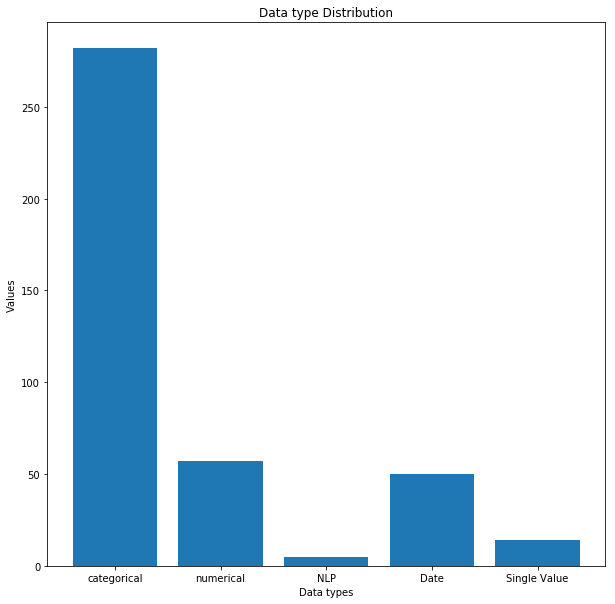

In [0]:
df_list = [data_cat, data_num, data_nlp, data_date, data_1val]
count_list = [len(i.columns) for i in df_list]
x_list = ['categorical', 'numerical', 'NLP', 'Date', 'Single Value']


plt.figure(figsize=(10, 10))
plt.bar(x_list, count_list)
plt.title('Data type Distribution')
plt.xlabel('Data types')
plt.ylabel('Values')
#plt.xlim(34.2,73.7)
#plt.ylim(40.45,40.95)

#width = buckets[1] - buckets[0]
#plt.bar(buckets, hist, align='center', width=width)
plt.show()


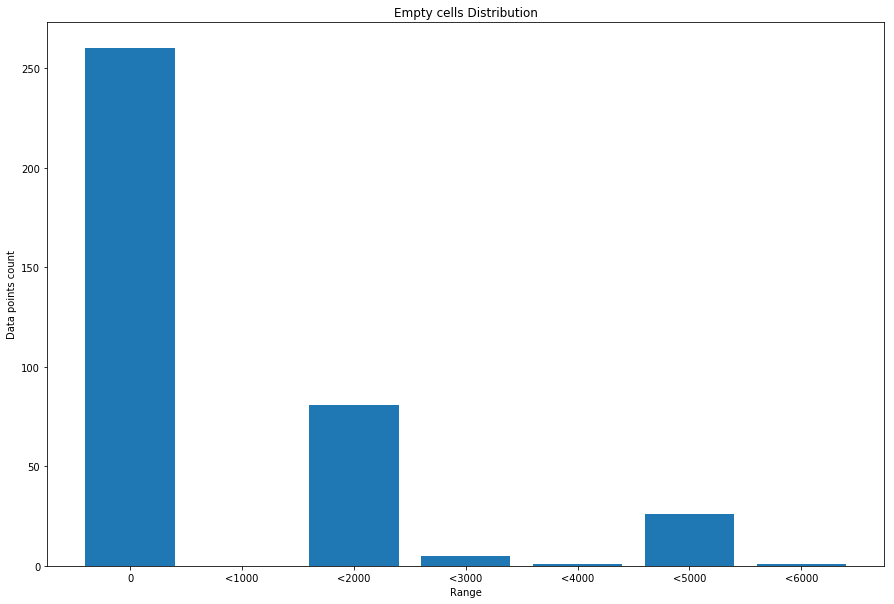

In [0]:
intervals = [1000*i for i in range(0,7)]
buckets = [len(x[(x == 0)])]
interval_list = ['0', '<1000', '<2000', '<3000', '<4000', '<5000', '<6000']

for i in range(0, len(intervals)-1):
    buckets.append(len(x[(x > intervals[i-1]) & (x <= intervals[i])])) 

plt.figure(figsize=(15, 10))
plt.bar(interval_list, buckets)
plt.title('Empty cells Distribution')
plt.xlabel('Range')
plt.ylabel('Data points count')
plt.show()


In [0]:
count = 0
full_cols =[]
for i in data.columns:
    if data[i].isnull().sum() == 0:
        count += 1
        full_cols.append(i)
count
print(full_cols) 

['session_id', 'session_date', 'last_update_date', 'session_last_update_date', 'referrer', 'creation_date', 'session_creation_date', 'sample', 'sunkgroup', 'gainlossgroup', 'anch1group', 'anch2group', 'anch3group', 'anch4group', 'gambfalgroup', 'gamblerfallacya_sd', 'gamblerfallacyb_sd', 'scalesgroup', 'reciprocitygroup', 'allowedforbiddenGroup', 'quoteGroup', 'flagfilter', 'flagGroup', 'MoneyGroup', 'moneyfilter', 'ContactGroup', 'IATfilter', 'totexpmissed', 'IATEXPfilter', 'imagineddescribe', 'text', 'user_id', 'session_status', 'previous_session_id', 'user_agent', 'session_created_by', 'study_url', 'study_name', 'us_or_international', 'lab_or_online', 'task_id.0', 'task_id.1', 'task_id.2', 'task_id.3', 'task_id.4', 'task_id.5', 'task_id.6', 'task_id.7', 'task_id.8', 'task_id.9', 'task_id.10', 'task_id.11', 'task_id.12', 'task_id.13', 'task_id.14', 'task_id.15', 'task_id.16', 'task_id.17', 'task_id.18', 'task_id.19', 'task_id.20', 'task_id.21', 'task_id.22', 'task_id.23', 'task_id.24

206 full columns

In [0]:
temp_full = data[full_cols]

In [0]:
len(intervals)

21

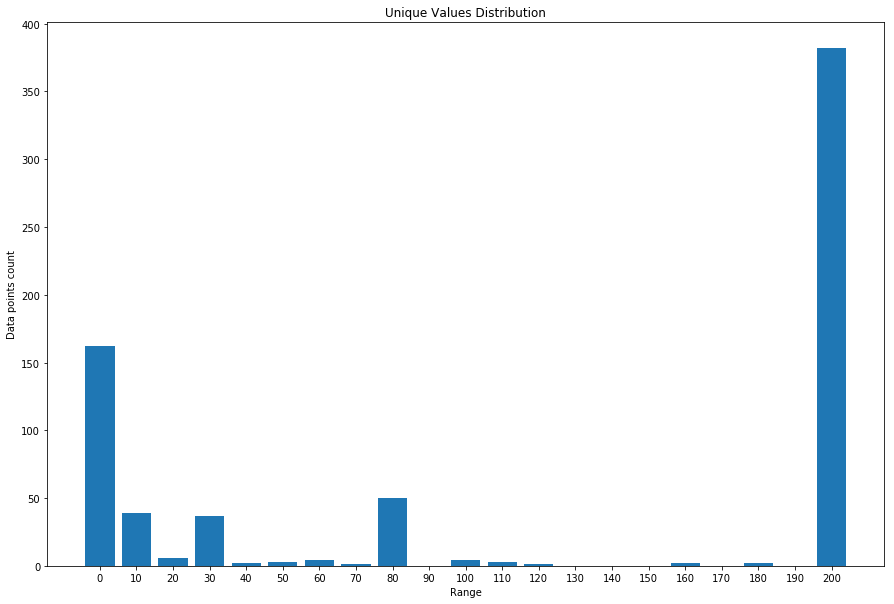

In [0]:
x = data.nunique(dropna=True)
unique_items =[]
intervals = [ 10*i for i in range(21)]
interval_list = [str(i) for i in intervals]

for i in range(1, len(intervals)):
    unique_items.append(len(x[(x > intervals[i-1]) & (x <= intervals[i])])) 

unique_items.append(len(x > intervals[-1]))
plt.figure(figsize=(15, 10))
plt.bar(interval_list,unique_items)
plt.title('Unique Values Distribution')
plt.xlabel('Range')
plt.ylabel('Data points count')
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

height = data.isna().sum()
bar = data.columns
plt.figure(figsize=(50,50))
plt.bar(bar, height)
plt.show()

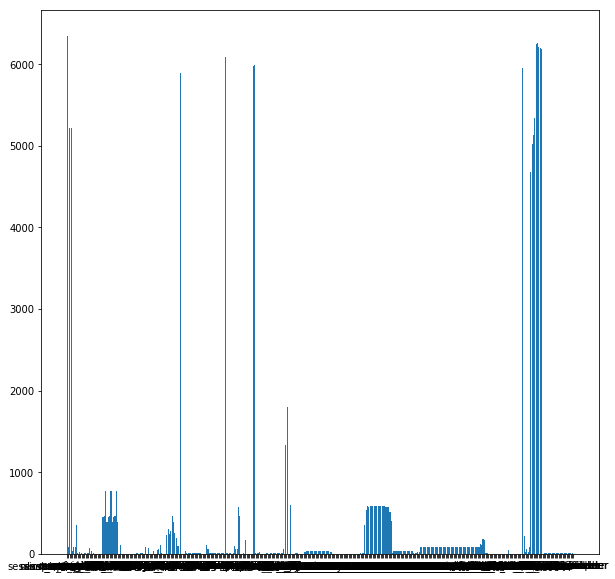

In [0]:
unique_items =[]
for i in data.columns:
    unique_items.append(data[i].nunique)

u1 = data.nunique()    
plt.figure(figsize=(10,10))
plt.bar(data.columns, u1)
plt.show()

# Test on 21 columns ( 20 full and 1 partial)

In [0]:

temp1 = data[['referrer','sample','sunkgroup','gainlossgroup','anch1group','anch2group','anch3group','anch4group','gambfalgroup','scalesgroup', 'allowedforbiddenGroup', 'reciprocitygroup', 'quoteGroup','flagfilter', 'flagGroup', 'MoneyGroup', 'moneyfilter', 'ContactGroup', 'IATfilter','exprace']]

In [0]:
temp1.shape

(6344, 20)

In [0]:
temp1_in = temp1['exprace']
temp1_co = temp1.drop(['exprace'], axis=1)

In [0]:
import random

prob_missing = 0.1
temp1_incomplete = temp1.copy()
for i in range(int(prob_missing * len(temp1))):
    ix = random.randint(1,len(temp1)-1)
    temp1_incomplete.loc[ix, 'IATfilter'] = np.nan
    

In [0]:
#MICE Implementation

from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
#temp_filled = IterativeImputer().fit_transform(temp1)

n_imputations = 5
XY_completed = []
for i in range(n_imputations):
    imputer = IterativeImputer(n_iter=5, sample_posterior=True, random_state=i)
    XY_completed.append(imputer.fit_transform(temp1_incomplete))

XY_completed_mean = np.mean(XY_completed, 0)
XY_completed_std = np.std(XY_completed, 0)

In [0]:
temp1_incomplete['IATfilter'].unique()

array([ 1., nan,  0.])

In [0]:
temp1['IATfilter']

In [0]:
np.unique(temp_filled[-1])

array([ 1.,  2.,  3., ..., 14., 15., 16.])

In [0]:
temp1['exprace'].unique()

array(['6', '10', '13', '11', '12', nan, '14', '16', '8', '7', '5', '9',
       '2', '3', '15', '1', 6.0, 10.0, 2.0, 5.0, 3.0], dtype=object)

In [0]:
for i in range(len(temp1)):
    if pd.isnull(temp1.loc[i, 'exprace']) != True:
        temp1.loc[i, 'exprace'] = int(temp1.loc[i, 'exprace']) 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#@title
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from keras.objectives import mse
from keras.models import Sequential
from keras.layers.core import Dropout, Dense
from keras.regularizers import l1_l2

from collections import defaultdict

In [0]:
#@title
def make_reconstruction_loss(n_features):

    def reconstruction_loss(input_and_mask, y_pred):
        X_values = input_and_mask[:, :n_features]
        #X_values.name = "X_values1"

        missing_mask = input_and_mask[:, n_features:]
        #missing_mask.name = "missing_mask1"
        observed_mask = 1 - missing_mask
        #observed_mask.name = "observed_mask1"

        X_values_observed = X_values * observed_mask
        #X_values_observed.name = "X_values_observed1"

        pred_observed = y_pred * observed_mask
        #pred_observed.name = "y_pred_observed1"

        return mse(y_true=X_values_observed, y_pred=pred_observed)
    return reconstruction_loss

In [0]:
#@title
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

In [0]:
#@title
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in temp1.columns[:-1]:
    temp1[i] = le.fit_transform(temp1[i]).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
#@title
temp1.isna().sum()

referrer                    0
sample                      0
sunkgroup                   0
gainlossgroup               0
anch1group                  0
anch2group                  0
anch3group                  0
anch4group                  0
gambfalgroup                0
scalesgroup                 0
allowedforbiddenGroup       0
reciprocitygroup            0
quoteGroup                  0
flagfilter                  0
flagGroup                   0
MoneyGroup                  0
moneyfilter                 0
ContactGroup                0
IATfilter                   0
exprace                  3399
dtype: int64

In [0]:
#@title
for i in temp1_incomplete.columns:
    print(temp1_incomplete[i].unique())

In [0]:
#@title
#temp1_missing = temp1['exprace']
#temp1 = temp1.drop(['exprace'], axis=1)

prob_missing = 0.3
temp1_incomplete = temp1.copy()
ix = [(row, col) for row in range(temp1.shape[0]) for col in range(temp1.shape[1])]
for row, col in random.sample(ix, int(round(prob_missing * len(ix)))):
    #if np.isnan(temp1_incomplete.iat[row, col]):
    temp1_incomplete.iat[row, col] = 99
        #temp1_incomplete.iat[row, col] = np.nan

In [0]:
#@title
missing_encoded = pd.get_dummies(temp1_incomplete)

In [0]:
#@title
for col in temp1.columns:
    missing_cols = missing_encoded.columns.str.startswith(str(col) + "_")
    missing_encoded.loc[temp1_incomplete[col].isnull(), missing_cols] = np.nan

In [0]:
#@title
imputer = Autoencoder(missing_encoded.values)
complete_encoded = imputer.train(train_epochs=300, batch_size=256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(976, input_dim=244, activation="relu", kernel_initializer="glorot_normal", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(244, activation="relu", kernel_initializer="glorot_normal", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(61, activation="relu", kernel_initializer="glorot_normal", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(122, activation="sigmoid", kernel_initializer="glorot_normal", kernel_regularizer=<keras.reg...)`


observed mae: 0.7246765597287095
observed mae: 0.6141907974627957
observed mae: 0.5789146418585908
observed mae: 0.5586699621368656
observed mae: 0.550857759895015
observed mae: 0.5466349946974041


#Classification approach using CART - Test

In [0]:
X_train = pd.DataFrame(columns = temp1.columns)
X_test = pd.DataFrame(columns = temp1.columns)
for i in range (len(temp1)):
    if pd.isnull(temp1.loc[i, 'exprace']) != True:
        X_train = X_train.append(temp1.loc[i])
    else:
        X_test = X_test.append(temp1.loc[i])

In [0]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [0]:
Y_train = X_train['exprace']
Y_test = X_test['exprace']

In [0]:
X_train.index

RangeIndex(start=0, stop=2945, step=1)

In [0]:
temp1.exprace.unique()

array([6, 10, 13, 11, 12, nan, 14, 16, 8, 7, 5, 9, 2, 3, 15, 1],
      dtype=object)

In [0]:
X_train.dtypes

referrer         object
sample           object
sunkgroup        object
gainlossgroup    object
anch1group       object
anch2group       object
anch3group       object
anch4group       object
gambfalgroup     object
scalesgroup      object
exprace          object
dtype: object

In [0]:
Y_train = Y_train.astype(str).astype(int)

In [0]:
class Cart1(object):

    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def compute_gini_similarity(self, groups, class_labels):
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val :
                data_left = np.vstack((data_left,row))

            if row[index] > val:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        class_labels = np.unique(data[:,-1])
        best_index = 999
        best_val = 999
        best_score = 999
        best_groups = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.compute_gini_similarity(groups,class_labels)

                if gini_score < best_score:
                    best_index = idx
                    best_val = row[idx]
                    best_score = gini_score
                    best_groups = groups
        result = {}
        result['index'] = best_index
        result['val'] = best_val
        result['groups'] = best_groups
        return result


    def split_branch(self, node, depth):
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = Cart1()
clf.fit(X_train.loc[:, X_train.columns != 'exprace'], Y_train)
clf
clf.predict(X_train.loc[:, X_test.columns != 'exprace'])